<Figure size 288x576 with 0 Axes>

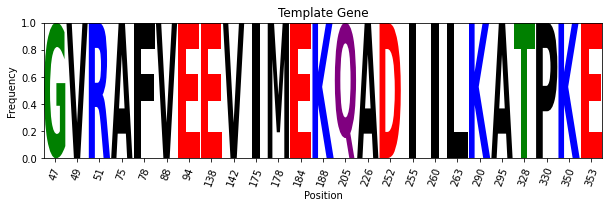

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

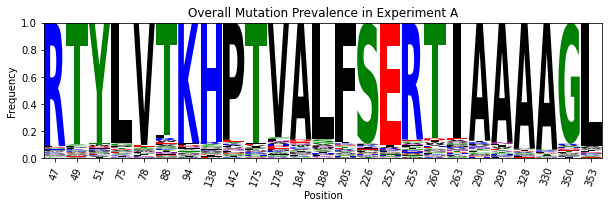

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

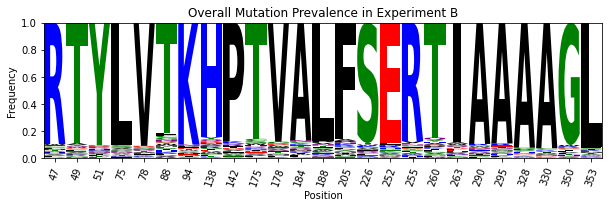

<Figure size 288x576 with 0 Axes>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import logomaker

MXN_SITES = [47, 49, 51, 75, 78, 88, 94, 138, 142, 175, 178, 
             184, 188, 205, 226, 252, 255, 260, 263, 290, 295, 
             328, 330, 350, 353]

BM3_DM='''MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKI
ADELGEIFKFEAPGRVTRYLSSQRLIKEACDES\
RFDKNLSQALKFVRDFVGDGLVTSWTHEKNWKK\
AHNILLPSFSQQAMKGYHAMMVDIAVQLVQKWE\
RLNADEHIEVPEDMTRLTLDTIGLCGFNYRFNS\
FYRDQPHPFITSMVRALDEAMNKLQRANPDDPA\
YDENKRQFQEDIKVMNDLVDKIIADRKASGEQS\
DDLLTHMLNGKDPETGEPLDDENIRYQIITFLI\
AGHETTSGLLSFALYFLVKNPHVLQKAAEEAAR\
VLVDPVPSYKQVKQLKYVGMVLNEALRLWPTAP\
AFSLYAKEDTVLGGEYPLEKGDELMVLIPQLHR\
DKTIWGDDVEEFRPERFENPSAIPQHAFKPFGN\
GQRACIGQQFALHEATLVLGMMLKHFDFEDHTN\
YELDIKETLTLKPEGFVVKAKSKKIPLGGIPSPSTEQSAKKVRK*'''.replace(' ','')

template_gene = ''.join([BM3_DM[i] for i in MXN_SITES])

dfa = pd.read_csv('experiment-a/all-scores-a.csv')
dfb = pd.read_csv('experiment-b/all-scores-b.csv')

tsa = pd.read_csv('tsne-a.csv', index_col=0)
tsb = pd.read_csv('tsne-b.csv', index_col=0)

dfag = pd.DataFrame([list(i) for i in dfa.gene])
dfag_c = pd.concat([dfag[i].value_counts() for i in dfag],
         axis=1).fillna(0)
dfag_c /= dfag_c.sum(axis=0)

def get_aafreq(genes):
    df = pd.DataFrame([list(i) for i in genes])
    df_c = pd.concat([df[i].value_counts() for i in df],
             axis=1).fillna(0)
    df_c /= df_c.sum(axis=0)
    return df_c
    

def mklogo(counts, 
           title=None,
           save_path=None,
          ):
    plt.figure(figsize=(4,8))
    logo = logomaker.Logo(counts.T, color_scheme='chemistry')
    plt.xlabel('Position')
    plt.ylabel('Frequency')
    plt.xticks(range(len(MXN_SITES)), MXN_SITES, rotation=70)
    if title is not None:
        plt.title(title)
    if save_path is not None:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()
        
freq_a = get_aafreq(dfa.gene)
freq_b = get_aafreq(dfb.gene)


mklogo(get_aafreq([template_gene]), title='Template Gene')
mklogo(get_aafreq([template_gene]), title='Template Gene', save_path='template-logo.png')

mklogo(freq_a, title='Overall Mutation Prevalence in Experiment A')
mklogo(freq_a, title='Overall Mutation Prevalence in Experiment A',
      save_path='exp-a-logo.png')

mklogo(freq_b, title='Overall Mutation Prevalence in Experiment B')
mklogo(freq_b, title='Overall Mutation Prevalence in Experiment B',
      save_path='exp-b-logo.png')

<Figure size 288x576 with 0 Axes>

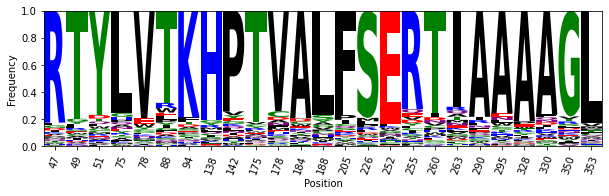

<Figure size 288x576 with 0 Axes>

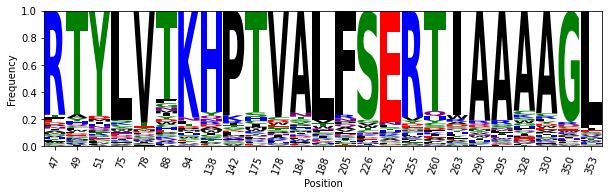

In [2]:
mklogo(get_aafreq(dfa.nlargest(1024,'score').gene))
mklogo(get_aafreq(dfb.nlargest(1024,'score').gene))

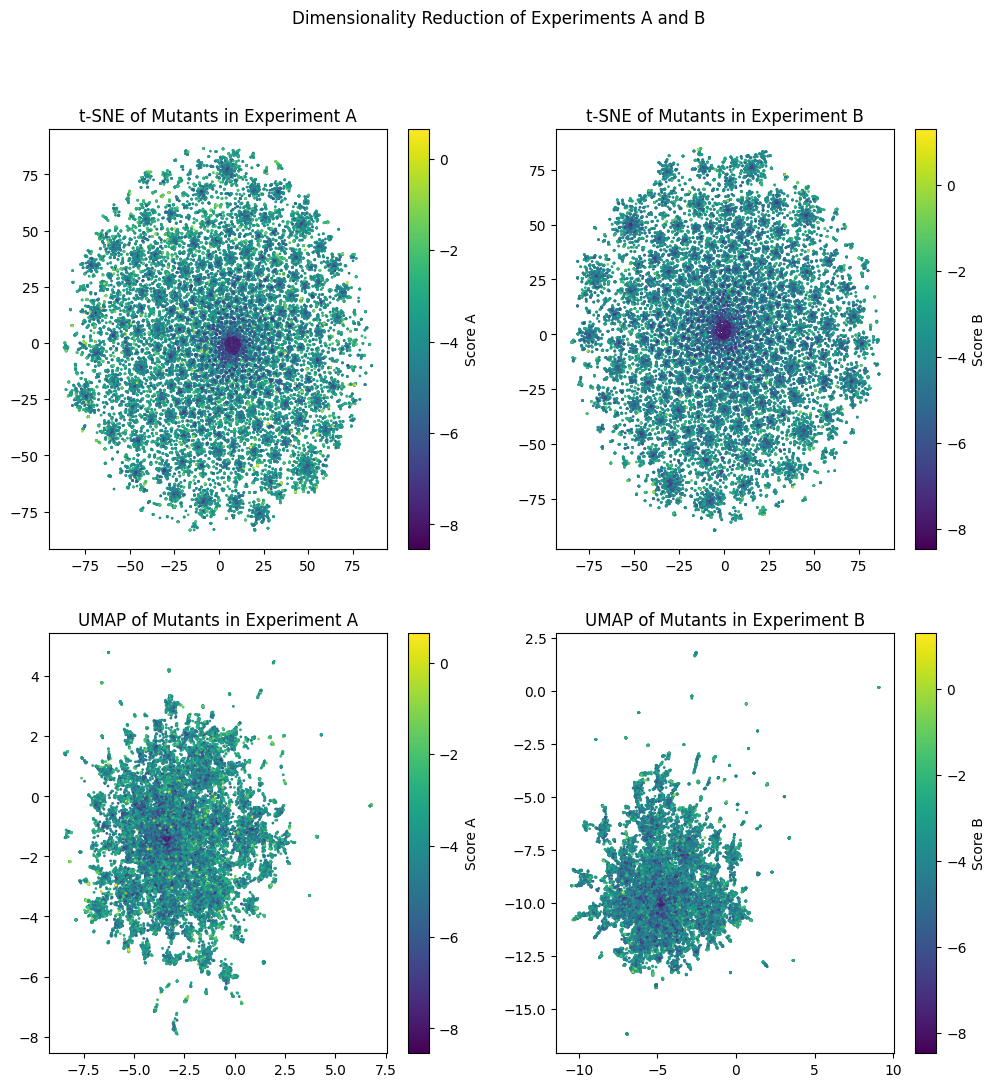

In [3]:
plt.style.use('default')

tsa = pd.read_csv('tsne-a.csv', index_col=0)
tsb = pd.read_csv('tsne-b.csv', index_col=0)
tsa.columns, tsb.columns = list('xy'), list('xy')

ua = pd.read_csv('umap-a.csv',index_col=0)
ub = pd.read_csv('umap-b.csv',index_col=0)
ua.columns, ub.columns = list('xy'), list('xy')

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i, j, k, l, m in zip(ax.flatten(), 
                   [tsa, tsb, ua, ub],
                   [dfa, dfb, dfa, dfb],
                  ['t-SNE of Mutants in Experiment A',
                   't-SNE of Mutants in Experiment B',
                   'UMAP of Mutants in Experiment A',
                   'UMAP of Mutants in Experiment B',
                  ],
                  ['Score A', 'Score B', 'Score A', 'Score B'],
                  ):
    scatter = i.scatter(j.x, 
                        j.y,
                        s=1,
                        c=k.score,
                        )
    i.set_title(l)
    fig.colorbar(mappable=scatter, ax=i, label=m)

fig.suptitle('Dimensionality Reduction of Experiments A and B')
plt.savefig('dimred-plt.png')
plt.show()

In [10]:
ds.tf.shade?

Signature:
ds.tf.shade(
    agg,
    cmap=['lightblue', 'darkblue'],
    color_key=['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', '#66c2a5', '#fc8d62', '#8da0cb', '#a6d854', '#ffd92f', '#e5c494', '#ffffb3', '#fb8072', '#fdb462', '#fccde5', '#d9d9d9', '#ccebc5', '#ffed6f'],
    how='eq_hist',
    alpha=255,
    min_alpha=40,
    span=None,
    name=None,
    color_baseline=None,
)
Docstring:
Convert a DataArray to an image by choosing an RGBA pixel color for each value.

Requires a DataArray with a single data dimension, here called the
"value", indexed using either 2D or 3D coordinates.

For a DataArray with 2D coordinates, the RGB channels are computed
from the values by interpolated lookup into the given colormap
``cmap``.  The A channel is then set to the given fixed ``alpha``
value for all non-zero values, and to zero for all zero values.

DataArrays with 3D coordinates are expected to contain values
distributed over different ca

t-SNE of Mutants in Experiment A,t-SNE of Mutants in Experiment B,UMAP of Mutants in Experiment A,UMAP of Mutants in Experiment B

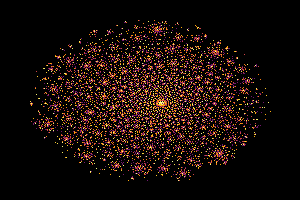
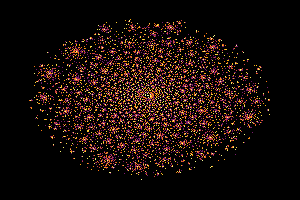
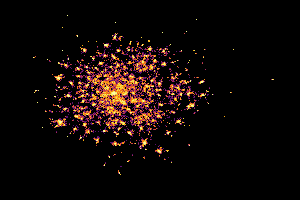
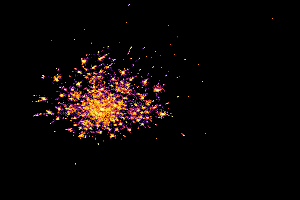

In [4]:
import datashader as ds

images = []
for i, j, k, l in zip([tsa, tsb, ua, ub],
                      [dfa, dfb, dfa, dfb],
                      ['t-SNE of Mutants in Experiment A',
                       't-SNE of Mutants in Experiment B',
                       'UMAP of Mutants in Experiment A',
                       'UMAP of Mutants in Experiment B'],
                      ['Score A', 'Score B', 'Score A', 'Score B'],
                       ):
    x, y = i.x, i.y
    canvas = ds.Canvas(x_range=[min(x)*1.25,max(x)*1.25],
                       y_range=[min(y)*1.25,max(y)*1.25],
                       plot_width=300,
                       plot_height=200)
    points = canvas.points(i, 'x', 'y')
    points = ds.tf.shade(points, 
                         cmap=plt.cm.inferno, 
                         name=k)
    points = ds.tf.set_background(points,"black")
    images.append(points)
im = ds.tf.Images(*images)
#im=points.to_pil()
im

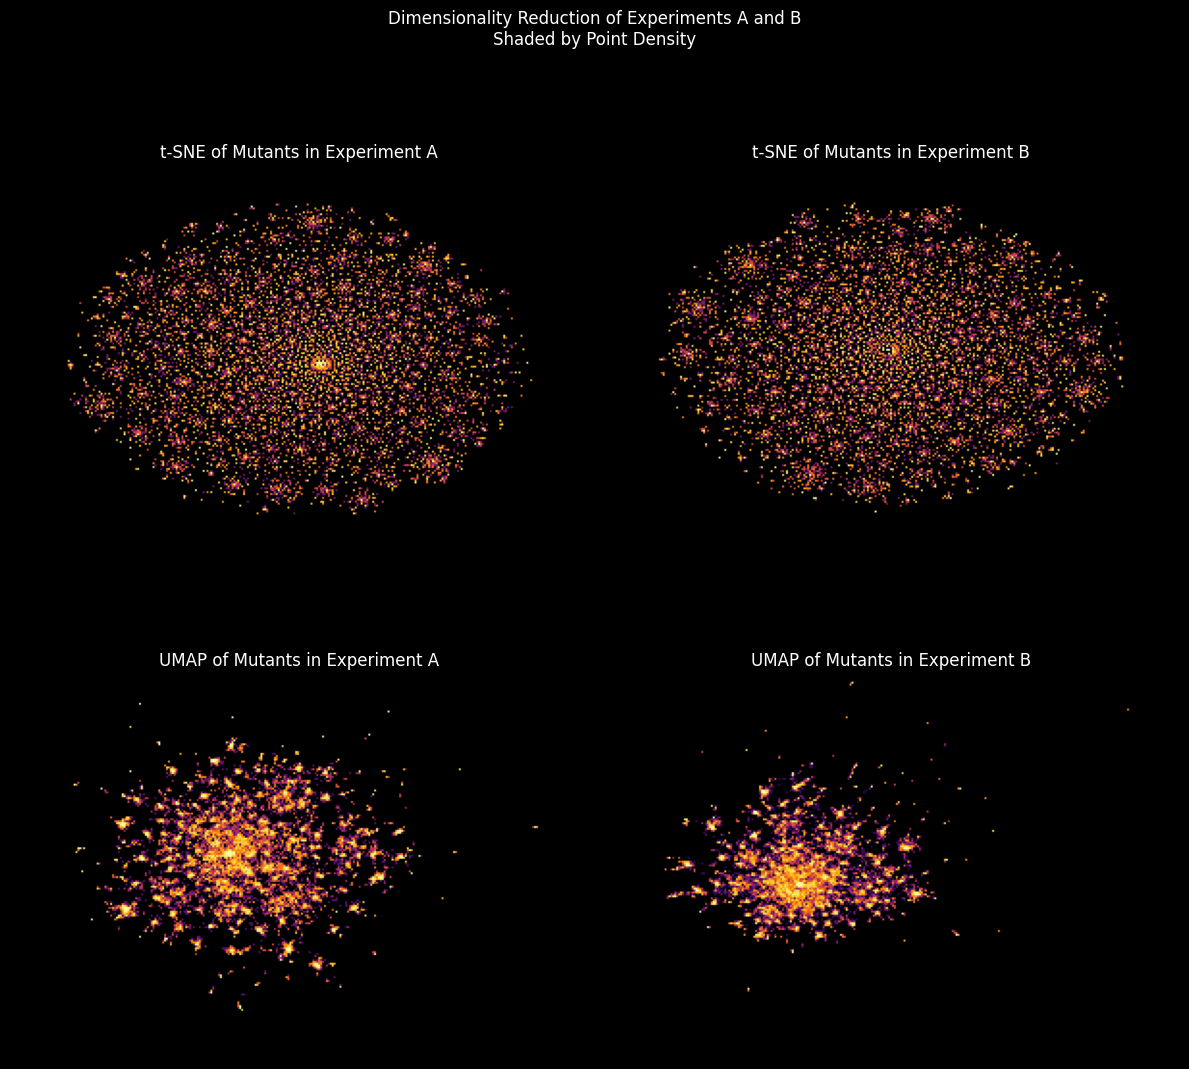

In [5]:
#plt.imshow(points.to_pil())

plt.style.use('dark_background')
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i, j, k, l, m in zip(ax.flatten(), 
                   images,
                   [dfa, dfb, dfa, dfb],
                  ['t-SNE of Mutants in Experiment A',
                   't-SNE of Mutants in Experiment B',
                   'UMAP of Mutants in Experiment A',
                   'UMAP of Mutants in Experiment B',
                  ],
                  ['Score A', 'Score B', 'Score A', 'Score B'],
                  ):

    i.imshow(j.to_pil())
    i.set_title(l)
    i.axis('off')
fig.suptitle('Dimensionality Reduction of Experiments A and B\n\
Shaded by Point Density')
plt.tight_layout()

plt.savefig('dimred-ds.png')
plt.show()

100%|█| 708/708 [00:03<00:00, 2
100%|█| 731/731 [00:03<00:00, 2
100%|█| 355/355 [00:01<00:00, 2
100%|█| 323/323 [00:01<00:00, 2


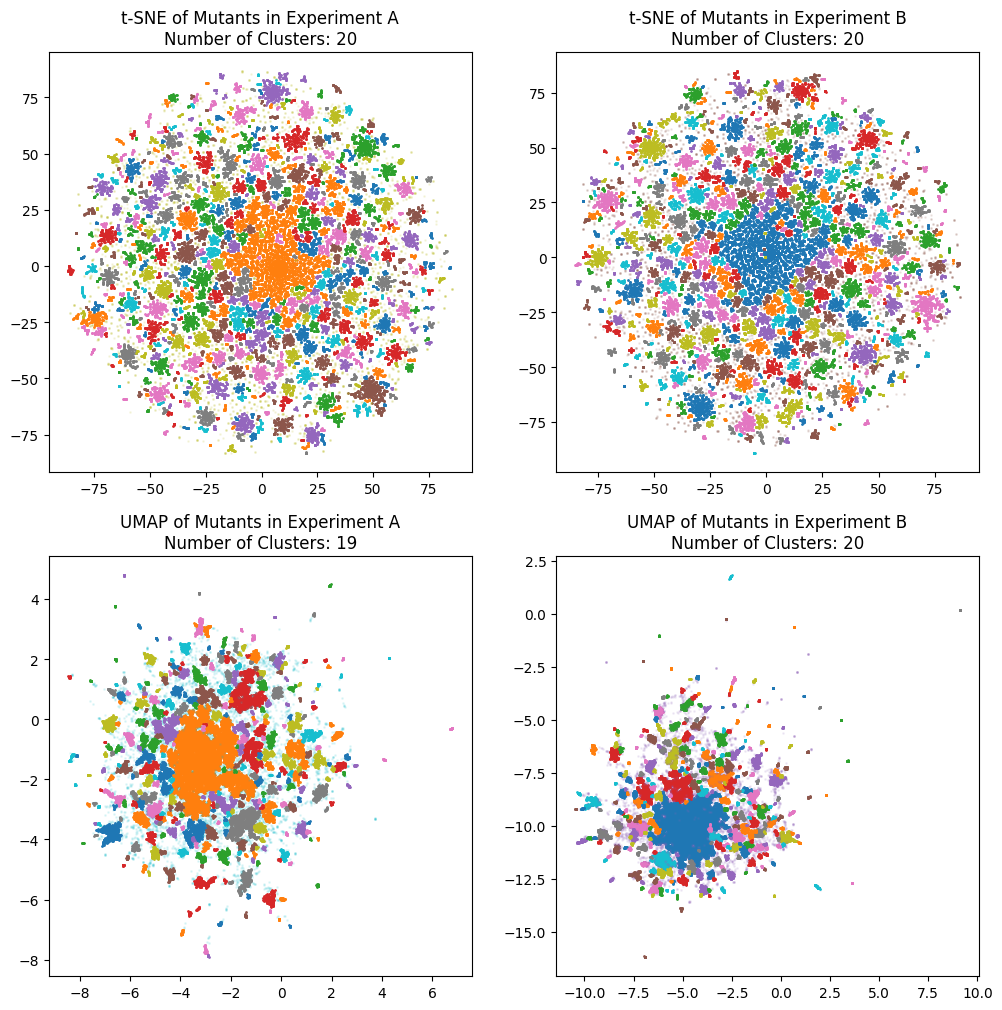

CPU times: user 47.2 s, sys: 126 ms, total: 47.3 s
Wall time: 47.3 s


In [6]:
%%time
from tqdm import tqdm
from sklearn.cluster import DBSCAN

def cluster(df, **kwargs):
    # eps=1/8,
    # min_samples=32,
    # metric='euclidean',
    # metric_params=None,
    # algorithm='auto',
    # leaf_size=30,
    # p=None,
    # n_jobs=512,
    dbscan = DBSCAN(**kwargs)
    return dbscan.fit_predict(df[['x','y']])

plt.style.use('default')

def plot_clusters(ax, df, clusters, title=None):
    x = pd.concat([df, pd.Series(clusters, name='cluster')], axis=1)
    for i in tqdm(x.cluster.unique()):
        x_i = x.loc[x['cluster'] == i, :]
        if i != -1:
            ax.scatter(x_i.x, 
                       x_i.y,
                       s=1,
                       )
        else:
            ax.scatter(x_i.x, 
                       x_i.y,
                       s=1,
                       alpha=0.1,
                       )
        if title is not None:
            ax.set_title(title)
    

clusters = {}
fig, ax = plt.subplots(2,2, figsize=(12,12))
for i,j,k,l in zip(ax.flatten(),
               [tsa, tsb, ua, ub],
               ['t-SNE of Mutants in Experiment A',
                't-SNE of Mutants in Experiment B',
                'UMAP of Mutants in Experiment A',
                'UMAP of Mutants in Experiment B'],
               ['tsa', 'tsb', 'ua', 'ub'],
                ):
    if 'ts' in l:
        clusters_ = cluster(j, eps=1.3, min_samples=8)
    else:
        clusters_ = cluster(j, eps=1/16, min_samples=8)
    clusters[l] = clusters_
    
    plot_clusters(ax=i,
                  df=j,
                  clusters=clusters_,
                  title=f"{k}\nNumber of Clusters: {len(set(k))}")
plt.savefig('dimred-plt-clusters.png')
plt.show()

In [7]:
import seaborn as sns

class Clus:
    def __init__(self,
                 df,
                 superset=None,
                 name=None,
                ):
        self.df = df
        cluster = df.cluster.unique()
        assert len(cluster) == 1
        self.cluster = cluster[0]
        self.superset = superset
    def __len__(self):
        return len(self.genes)
    @property
    def nseq(self):
        return len(set(self.genes))
    @property
    def props(self):
        return self.df[['score','dist_mean','aff_mean','ham']]
    @property
    def xy(self):
        return self.df[['x','y']]
    @property
    def genes(self):
        return self.df.gene
    def logo(self, **kwargs):
        mklogo(get_aafreq(self.genes), **kwargs)
    def distr(self):
        fig, ax = plt.subplots(2,2, figsize=(8,8))
        df = self.props
        for i,j in zip(ax.flatten(), df.columns):
            sns.kdeplot(df[j], ax=i)
            s = j.capitalize().replace('_',' ')
            i.set_title(f"{s}s for Cluster {self.cluster}")
            i.set_xlabel(s)
            i.set_ylabel('Count')
        plt.tight_layout()
        plt.show()
    def mkreport(self, save_path=None):
        
        fig, axd = plt.subplot_mosaic([['l1', 'r1'],
                                       ['l2', 'r2'],
                                       ['bottom', 'bottom']],
                                      constrained_layout=True,
                                      figsize=(16,8))
        df = self.props
        for i,j in zip(['l1','r1','l2','r2'], 
                       df.columns):
            if self.superset is not None:
                sns.kdeplot(self.superset[j], ax=axd[i], lw=0, fill=True, alpha=0.5, label="Global Distribution")
            sns.kdeplot(df[j], ax=axd[i], lw=0, fill=True, alpha=0.5, label=f"Cluster {self.cluster}")
            s = j.capitalize().replace('_',' ')
            axd[i].legend()
            axd[i].set_title(f"{s}s for Cluster {self.cluster}")
            axd[i].set_xlabel(s)
            axd[i].set_ylabel('Count')
            
        counts = get_aafreq(self.genes)
        logo = logomaker.Logo(counts.T, 
                              color_scheme='chemistry',
                              ax=axd['bottom'])
        axd['bottom'].set_xlabel('Position')
        axd['bottom'].set_ylabel('Frequency')
        axd['bottom'].set_xticks(range(len(MXN_SITES)), MXN_SITES, rotation=70)
        #plt.tight_layout()
        if save_path is None:
            plt.show()
        else:
            plt.savefig(save_path)
            plt.close()
    
    
class Clusters:
    def __init__(self,
                 df,
                 clusters,
                 xy=None,
                 name=None,
                ):
        self.df = pd.concat([df, 
                             xy,
                             pd.Series(clusters, name='cluster')],
                            axis=1).dropna()
    @property
    def clusters(self):
        return self.df.cluster
    def __len__(self):
        return len(self.df.cluster.unique())
    def __iter__(self):
        for i in self.df.cluster.unique():
            yield self[i]
    def __getitem__(self, i):
        x = self.df.loc[self.df.cluster == i, :]
        if len(x) > 0:
            return Clus(x, superset=self.df)
    def plot_dists(self, 
                   save_path=None):
        props = ['score','dist_mean','aff_mean','ham']
        fig, ax = plt.subplots(2,2, figsize=(6,6))
        for i,j in zip(ax.flatten(), props):
            for k in tqdm(self):
                sns.kdeplot(k.props[j], 
                            ax=i,
                            fill=True,
                            lw=0,
                            alpha=0.3)
            s = j.capitalize().replace('_',' ')
            i.set_title(f"{s} Distributions of Clsuters")
        plt.tight_layout()
        fig.suptitle('Metric Distributions of All Clusters')
        if save_path is not None:
            plt.savefig(save_path)
            plt.close()
        else:
            plt.show()

In [8]:
import json
import requests
from functools import lru_cache

class Codon:
    def __init__(self, **kwargs):
        self.__dict__ = {**self.__dict__, **kwargs}
    def __repr__(self):
        return f"{self.ambiguous_codon}, {''.join(self.listaas)}"
    @property
    def listaas(self):
        return [i['amino_acid'] for i in self.amino_acids]
    

@lru_cache(128)
def qgenie(aas, organism):
        r = requests.get(f'https://codongenie.appspot.com/codons?aminoAcids={aas.upper()}&organism={organism}')
        if r.status_code ==200:
            return json.loads(r.text)
        else:
            print(r.status_code)
            
def get_codons(genes, 
               organism=37762, # e. coli
               threshold=0,
               quiet=False):
    o = {}
    freq = get_aafreq(genes)
    freq.columns = MXN_SITES
    if quiet:
        tqdm = lambda x : x
    for i in tqdm(freq.columns):
        aas = ''.join(freq.loc[freq[i] > threshold, i].index)
        o[i] = qgenie(aas, organism)
    return o

        
def pick_codons(codons):
    getaas = lambda c : [i['amino_acid'] for i in c['amino_acids']]
    keys = list(codons.keys())
    values = list(codons.values())
    o = {}
    for pos, codon_candidates in zip(keys,values):
        nonstop = list(filter(lambda i : 'Stop' not in getaas(i), 
                              codon_candidates))
        if len(nonstop) > 0:
            cdx = Codon(**max(nonstop, key=lambda j : j['score']))
        else:
            cdx = Codon(**max(codon_candidates, key=lambda j : j['score']))
            
        o[pos] = {'codon': cdx.ambiguous_codon,
                  'expansion':cdx.ambiguous_codon_expansion,
                  'num_variants':len(cdx.ambiguous_codon_expansion),
                  'amino_acids':cdx.listaas,
                  }
    codon_report = pd.DataFrame(o)
    return codon_report.T

def plot_actual_codon_coverage(codon_report, save_path=None):
    x = pd.DataFrame([list(i) for i in codon_report.amino_acids]).T
    x = pd.concat([x[i].value_counts() for i in x], axis=1).fillna(0).T
    x = x.div(x.sum(axis=1), axis=0)
    mklogo(x.T, save_path=save_path)

In [9]:
import os
import heapq


if not os.path.exists('codons'):
    os.mkdir('codons')
    
for i in clusters:
    path = os.path.join('codons', i)
    if not os.path.exists(path):
        os.mkdir(path)
        
    clusts_ = Clusters(dfa, clusters[i])
    bestn = heapq.nlargest(8,
                           clusts_,
                           key=lambda x : x.props.score.mean())
    
    for j in tqdm(bestn):
        j.mkreport(save_path=os.path.join(path, f"clus_{j.cluster}.png"))
        #j.mkreport()
        cdxj = get_codons(j.genes, threshold=0.1, quiet=True)
        try:
            codon_report = pick_codons(cdxj)
            codon_report.to_csv(os.path.join(path, f"clus_{j.cluster}_codons.csv"),
                                index=False)
            plot_actual_codon_coverage(codon_report, 
                                       save_path=os.path.join(path, f"clus_{j.cluster}-codon-coverage.png"))
        except:
            pass


100%|█| 8/8 [00:36<00:00,  4.60
100%|█| 8/8 [00:45<00:00,  5.74
 38%|▍| 3/8 [00:11<00:18,  3.66/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)
 50%|▌| 4/8 [00:14<00:14,  3.53/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 2

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>

<Figure size 400x800 with 0 Axes>